In [177]:
## INSTEAD OF SKLEARN DATA IS TAKEN FROM .csv FILE
# from sklearn.datasets import load_iris
# iris = load_iris(as_frame=True)

import pandas as pd
import numpy as np

df = pd.read_csv('iris.csv')

# np.random.shuffle(df.values)  - it does not shuffle
# this does:
df = df.sample(frac=1, random_state=42)

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor


In [147]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [148]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [149]:
df.drop(columns="Id", inplace=True)

In [150]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [151]:
df["Species"].unique()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [152]:
X = df.drop(columns=["Species"])
Y = df["Species"]

In [153]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)      # converting string names into unique integers

Y

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [155]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[4]),      # input_shape=(4,)
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3, activation="sigmoid")
])

In [156]:
from tensorflow.keras.models import clone_model
model_2 = clone_model(model)

In [157]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 4)                 0         
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
 dense_15 (Dense)            (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


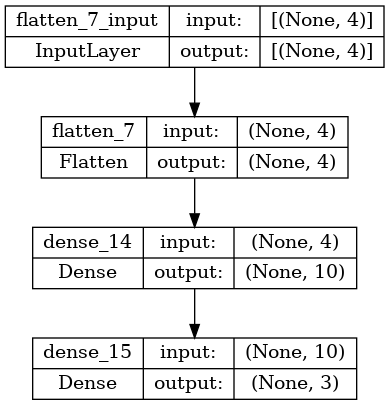

In [182]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file="network_schema.png")

In [159]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.37783623, -0.3306236 , -0.10518807, -0.29354453, -0.28759703,
        -0.17646274, -0.47374776, -0.42927027,  0.5407078 ,  0.38511693],
       [ 0.07914525,  0.05105895, -0.32688153, -0.47220194,  0.46232748,
        -0.49565852, -0.19802526,  0.33449423, -0.49168122, -0.05561531],
       [ 0.40974367,  0.56668437,  0.52748835,  0.31412202, -0.6394109 ,
         0.49588323,  0.2993595 , -0.39123023, -0.32286867, -0.38588226],
       [-0.44023845,  0.5745956 , -0.5260502 ,  0.4577093 ,  0.41110158,
         0.32947904,  0.29115194, -0.13500482,  0.19913423,  0.48580658]],
      dtype=float32)

In [160]:
weights.shape

(4, 10)

In [161]:
biases.shape

(10,)

In [162]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [163]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5041 - accuracy: 0.3250
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2464 - accuracy: 0.3250
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.1125 - accuracy: 0.3250
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0326 - accuracy: 0.3250
Epoch 5/100


4/4 [==============================] - 0s 5ms/step - loss: 0.9728 - accuracy: 0.4917
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9242 - accuracy: 0.6250
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8856 - accuracy: 0.6417
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8535 - accuracy: 0.6500
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8273 - accuracy: 0.6833
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8032 - accuracy: 0.8000
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7852 - accuracy: 0.8167
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7681 - accuracy: 0.6917
Epoch 13/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7516 - accuracy: 0.6750
Epoch 14/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7390 - accuracy: 0.7000
Epoch 15/100
4/4 [===================

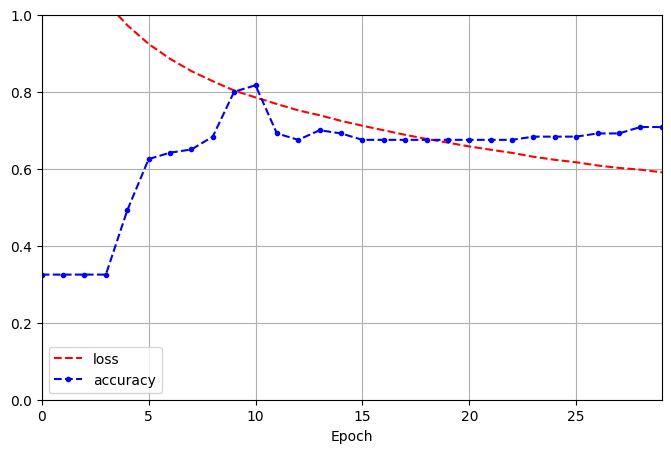

In [164]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "b--."])
plt.legend(loc="lower left")
plt.show()

In [165]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 77ms/step - loss: 0.3339 - accuracy: 0.9667


[0.33393028378486633, 0.9666666388511658]

In [166]:
# model.predict(X_test[0])

### Using EARLY STOPPING from keras.callbacks

In [167]:
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [168]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

history_2 = model_2.fit(X_train, Y_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100


4/4 [==============================] - 0s 7ms/step - loss: 1.3566 - accuracy: 0.3250
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1709 - accuracy: 0.3250
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.1019 - accuracy: 0.2750
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0809 - accuracy: 0.3500
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0663 - accuracy: 0.4000
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0572 - accuracy: 0.4750
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0517 - accuracy: 0.5833
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0408 - accuracy: 0.6083
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0326 - accuracy: 0.6333
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0256 - accuracy: 0.6333
Epoch 11/100
4/4 [=======================

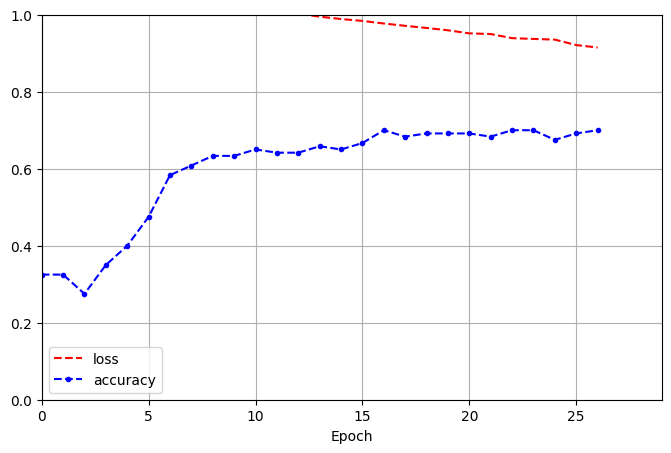

In [169]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "b--."])
plt.legend(loc="lower left")
plt.show()

In [170]:
model_2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 74ms/step - loss: 0.9491 - accuracy: 0.6000


[0.9491215348243713, 0.6000000238418579]

## DIFFERENT APPROACH

In [183]:
from tensorflow import keras

In [184]:
train_df = pd.read_csv('iris.csv')
np.random.shuffle(train_df.values)

print(train_df.head())

train_x = np.column_stack((train_df.SepalLengthCm.values, train_df.SepalWidthCm.values, train_df.PetalLengthCm.values, train_df.PetalWidthCm.values))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [185]:
# LABEL ENCODING for training set

print(train_df.Species.unique())

species_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
train_df['Species'] = train_df.Species.apply(lambda x: species_dict[x])

print('\nAfter label encoding:')
print(train_df.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

After label encoding:
[0 1 2]


In [186]:
# LABEL ENCODING for training set - using sklearn

# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# train_df['Species']= label_encoder.fit_transform(train_df['Species'])
# train_df['Species'].unique()

In [187]:
model = keras.Sequential([
	keras.layers.Dense(64, input_shape=(4,), activation='relu'),
    # keras.layers.Dropout(0.2),									# % of neurons (of previous layer) that will be dropped
    keras.layers.Dense(64, activation='relu'),
	keras.layers.Dense(64, activation='relu'),						# adding layer, because quadratic example is more complex
	keras.layers.Dense(3, activation='sigmoid')])

In [188]:
optimizers = {'Adadelta': None, 'Adagrad': None, 'Adam': None, 'RMSprop': None, 'SGD': None}

early_stopping = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

best_optimizer = None
best_accuracy = 0
best_optimizer_weights = None

for i, _ in optimizers.items():

    print(f'\n{i}')
    model.compile(optimizer=i, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    results = model.fit(train_x, train_df.Species.values, batch_size=4, epochs=10, callbacks=[early_stopping])

    current_accuracy = max(results.history['accuracy'])
    print(f'\nBest Accuracy: {current_accuracy:.4f} at epoch {results.history["accuracy"].index(current_accuracy) + 1}')
    optimizers[i] = round(current_accuracy, 4)

    if current_accuracy > best_accuracy:
        best_optimizer = i
        best_accuracy = current_accuracy
        best_optimizer_weights = model.get_weights()

    
print('\n\n------------')
print(f'Optimizers: {optimizers}')
print(f'Best optimizer: {best_optimizer}')

model.set_weights(best_optimizer_weights)


Adadelta
Epoch 1/10


/home/hubert/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-02-28 21:13:24.818572: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


38/38 [==============================] - 1s 6ms/step - loss: 1.1171 - accuracy: 0.3333
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 1.1150 - accuracy: 0.3333
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 1.1130 - accuracy: 0.3333
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 1.1110 - accuracy: 0.3333

Best Accuracy: 0.3333 at epoch 1

Adagrad
Epoch 1/10
38/38 [==============================] - 1s 5ms/step - loss: 1.0445 - accuracy: 0.4000
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.9891 - accuracy: 0.5267
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.9480 - accuracy: 0.7133
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.9192 - accuracy: 0.7000
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.8904 - accuracy: 0.8667
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.8679 - accur

In [190]:
# LABEL ENCODING for testing set

test_df = pd.read_csv('iris.csv')
test_x = np.column_stack((test_df.SepalLengthCm.values, test_df.SepalWidthCm.values, test_df.PetalLengthCm.values, test_df.PetalWidthCm.values))

test_df['Species'] = test_df.Species.apply(lambda x: species_dict[x])

In [191]:
# LABEL ENCODING for testing set - using sklearn

# test_df['Species']= label_encoder.fit_transform(test_df['Species'])
# test_df['Species'].unique()

In [192]:
# EVALUATION

evaluation = model.evaluate(test_x, test_df.Species.values)

5/5 [==============================] - 0s 6ms/step - loss: 0.1552 - accuracy: 0.9267


/home/hubert/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [193]:
# PREDICTION of random sample

random_index = np.random.randint(0, len(test_df))

random_sample = test_x[random_index].reshape(1, -1)     # reshaping to (1, 4) as there are 4 features

ground_truth = test_df.iloc[random_index]['Species']
ground_truth_species = None


prediction_probs = model.predict(random_sample)
prediction_probs = np.round(prediction_probs, decimals=4)

predicted_label = np.argmax(prediction_probs)
predicted_label_species = None

for key, value in species_dict.items():
    if value == ground_truth:
        ground_truth_species = key
    if value == predicted_label:
        predicted_label_species = key
    if ground_truth_species != None and predicted_label_species != None:
        break

# Print the ground truth and prediction
print(f"Ground Truth: {int(ground_truth)} ({ground_truth_species})")
print(f"Prediction: {predicted_label} ({predicted_label_species})\n(Probability distribution: {prediction_probs})")

1/1 [==============================] - 0s 129ms/step
Ground Truth: 1 (Iris-versicolor)
Prediction: 1 (Iris-versicolor)
(Probability distribution: [[0.1672 0.9266 0.1599]])
